In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# The dataset
# The dataset is a list of 5 roasting temperatures and the corresponding
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

x,y = load_coffee_data()

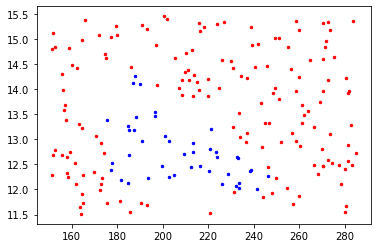

In [3]:
pos = y == 1
neg = y == 0


good_1 = x[:,0].reshape((-1,1))[pos]
good_2 = x[:,1].reshape((-1,1))[pos]
good_X = np.vstack([good_1, good_2])
good_X = good_X.transpose()

bad_1 = x[:,0].reshape((-1,1))[neg]
bad_2 = x[:,1].reshape((-1,1))[neg]
bad_X = np.vstack([bad_1, bad_2])
bad_X = bad_X.transpose()

fig, ax = plt.subplots()
ax.scatter(bad_X[:,0], bad_X[:,1], label = "Bad roast", c = "red", s = 6)
ax.scatter(good_X[:,0], good_X[:,1], label = "Good roast", c = "blue", s = 6)
plt.show()

In [4]:
# Normalizing the data
layerNorm = tf.keras.layers.Normalization(axis = -1)

# Making the normalization layer learn the mean and variance of the data
layerNorm.adapt(x)
xNorm = layerNorm(x)

In [8]:
# Defining the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

def dense(xIn, w, b):
    # Calculates the output of a dense layer with m units. 
    # if the length of input is n we have:
    # Args:
    #   xIn: float (1,n): input to the layer
    #   w: float (n,m): The weight matrix
    #   b: float (1,m): The bias vector
    # Returns:
    #   float (1,m): The output of the layer
    m = w.shape[1]
    n = xIn.shape[0]
    out_ = np.zeros((1, m))
    for i in range(m):
        out_[0,i] = sigmoid(np.dot(w[:,i], xIn) + b[i])

    return out_.reshape((m,))

def sequental(x,W,B):
    # definign a sequence of dense layers
    # Args:
    #   x: input number
    #   W: A list of weights in each layer
    #   B: A list of bias vectors of each layer

    n = len(W)

    ai = []
    temp = x
    for i in range(n):
        # print(temp)
        temp = dense(temp, W[i], B[i])
        # print(dense(temp, W[i], B[i]))
        # print("---")
    
    return temp

def predict(X, W, B):
    m = X.shape[0]
    p = np.zeros((m,1))
    for i in range(m):
        p[i] = sequental(X[i,:],W,B)
    
    return p

In [9]:
W = [
    np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] ),
    np.array( [[-31.18], [-27.59], [-32.56]] )
]

B = [
    np.array( [-9.82, -9.28,  0.96] ),
    np.array( [15.41] )
]

X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = layerNorm(X_tst)  # remember to normalize
predictions = predict(X_tstn, W, B)
print(predictions)
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

[[9.71932288e-01]
 [3.28978626e-08]]
decisions = 
[[1.]
 [0.]]


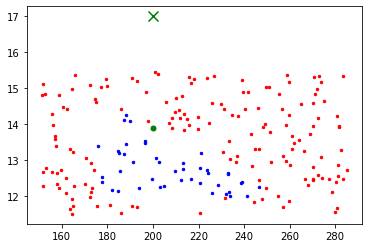

In [45]:
pos = y == 1
neg = y == 0


good_1 = x[:,0].reshape((-1,1))[pos]
good_2 = x[:,1].reshape((-1,1))[pos]
good_X = np.vstack([good_1, good_2])
good_X = good_X.transpose()

bad_1 = x[:,0].reshape((-1,1))[neg]
bad_2 = x[:,1].reshape((-1,1))[neg]
bad_X = np.vstack([bad_1, bad_2])
bad_X = bad_X.transpose()

fig, ax = plt.subplots()
ax.scatter(bad_X[:,0], bad_X[:,1], label = "Bad roast", c = "red", s = 6)
ax.scatter(good_X[:,0], good_X[:,1], label = "Good roast", c = "blue", s = 6)

for i in range(X_tst.shape[0]):
    if predictions[i] < .5:
        ax.scatter(X_tst[i,0],X_tst[i,1], c = "g", s = 100, marker = "x")
    if predictions[i] > .5:
        ax.scatter(X_tst[i,0],X_tst[i,1], c = "g", s = 100, marker = ".")

plt.show()